In [1]:
# Lab assignment 2 - Section 3
# Implementation and Applications
# Question 5 - (a)

import numpy as np

#defining the function
def function_a(x):

    #enter the function that need to be tested

    fx = np.exp(-(x**2))

    return fx

#compostite trapozoidal rule implementation
def composite_trapezoidal (a, b, N, input_func):

    h = (b-a)/N
    loop_value = 0

    for i in range(1, N):

        loop_value += input_func(a + i*h)

     #step size calculation

    answer = h*(input_func(a) + input_func(b))/2 + h*loop_value

    return answer

print(composite_trapezoidal(0,1,100,function_a))


0.7468180014679697


In [2]:
# Question 5 - (b)

#defining the function
def function_b(ec):

    #enter the function that need to be tested

    fx = np.exp(ec)*(ec**2)

    return fx

#second derivative of the function
def second_der_func_b(ec):

    fx = np.exp(ec)*(ec**2 + 4*ec + 2)

    return fx

#function to find the maximum second derivative value
def maximum_f2x(a, b, step):

    f2der_values = []

    for i in np.arange(a, b, step):

        f2der_values.append(second_der_func_b(i))

    return max(f2der_values)



e0 = 8.859*10**(-12)
sigma = 0.36
N = 100
a = 0

#value calculation loop
for k in range(1,11):

    r = k/10
    #print(r , (sigma/(e0*r**2))*(composite_trapezoidal(0, r, N, function_b)))

    #maximum 2nd derivative value
    max_f2der_value = maximum_f2x(a, r, 0.01)

    #print(max_f2der_value)

    #calculating the step size for error to be less than 10**(-10)
    h_min = (12*10**(-10))/(r - a)*max_f2der_value

    #print(h_min)

    N_correct = (r - a)/h_min

    N_correct = round(N_correct)

    #print(round(N_correct))

    print(r , (sigma/(e0*r**2))*(composite_trapezoidal(0, r, N, function_b)), (sigma/(e0*r**2))*(composite_trapezoidal(0, r, N_correct, function_b)))



0.1 1460403890.5985284 1460325297.3473656
0.2 3150053357.622635 3149871367.4349437
0.3 5097786133.719101 5097470725.022995
0.4 7335802148.323776 7335317166.981519
0.5 9900041760.179758 9899343860.506632
0.6 12830605705.735336 12829643125.970388
0.7 16172221308.878096 16170932456.88609
0.8 19974759988.80919 19973071810.37272
0.9 24293811647.03022 24291637745.347538
1.0 29191322117.0589 29188560587.573


Error = (yExact - y): [ 0.         -0.03689759 -0.09250299 -0.06848053 -0.03633602 -0.01743282
 -0.00805341 -0.00366262 -0.00165451 -0.00074518 -0.00033518]
Norm                : 0.12772511650661153


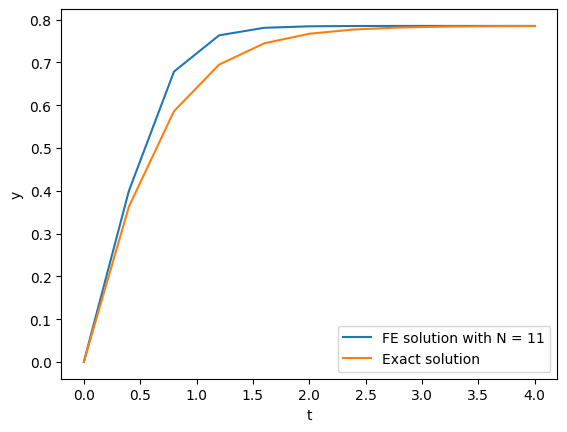

In [3]:
# Question 6

import numpy as np
import math
import matplotlib.pyplot as plt

#forward euler 
def feuler(f, T, y0, N):

    #step size
    H = (T[1] - T[0])/(N-1)

    #t array
    t = np.linspace(T[0], T[1], N)

    #create solutions array as a zero array in the begingng
    y = np.zeros(N)

    #IVP substitution
    y[0] = y0

    #calculation loop
    for i in range(1,N):
        y[i] = y[i-1] + H*f( y[i-1])
        
    
    return t, y

#example function
def f(y):
    
    return math.cos(2*y)

T = [0, 4]
y0 = 0
n = 11
t, y = feuler(f, T, y0, n)
yExact = 0.5*np.arcsin((np.exp(4*t)-1)/(np.exp(4*t)+1))

error = yExact - y

norm = np.linalg.norm(error , 2)

print("Error = (yExact - y):", error)
print("Norm                :", norm)

plt.plot(t, y, label="FE solution with N = %d" %(n))
plt.plot(t, yExact, label="Exact solution")
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.show()


Nk     5 hk 1.0000 Norm 0.474991 
Nk    50 hk 0.1000 Norm 0.274477 
Nk   500 hk 0.0100 Norm 0.766472 
Nk  5000 hk 0.0010 Norm 2.392596 
Nk 50000 hk 0.0001 Norm 7.556212 


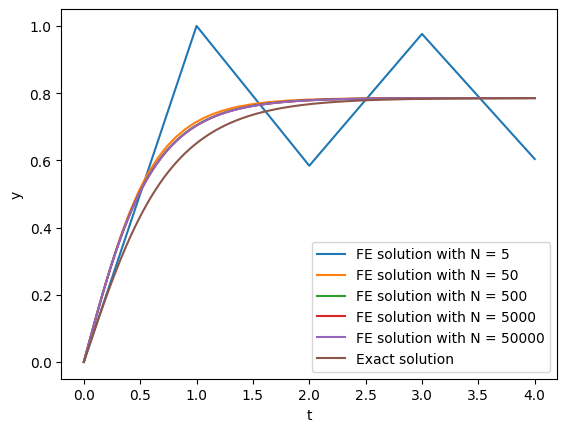

In [4]:
# Question 6 - c
# Modifying the feuler function

def feuler_m(f, T, y0, N, H):

    #t array
    t = np.linspace(T[0], T[1], N)

    #create solutions array as a zero array in the begingng
    y = np.zeros(N)

    #IVP substitution
    y[0] = y0

    #calculation loop
    for i in range(1,N):
        y[i] = y[i-1] + H*f( y[i-1])
        
    
    return t, y

#example function
def f(y):
    
    return math.cos(2*y)

T = [0, 4]
y0 = 0

k = [1,2,3,4]

h = [1]
Nk = [5]

for i in k:

    h_next = h[i-1]/10
    k_next = Nk[0]*10**i

    h.append(h_next)
    Nk.append(k_next)

#calculation loop
for i in range(len(h)):
    
    t, y = feuler_m(f, T, y0, Nk[i], h[i])
    plt.plot(t, y, label="FE solution with N = %d" %(Nk[i]))

    yExact = 0.5*np.arcsin((np.exp(4*t)-1)/(np.exp(4*t)+1))

    error = yExact - y
    norm = np.linalg.norm(error , 2)
    print("Nk %5d hk %.4f Norm %f " %(Nk[i], h[i], norm))


plt.plot(t, yExact, label="Exact solution")
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.show()


The age of the artifact which has N(t) = 4 is 10185.56954630014 years


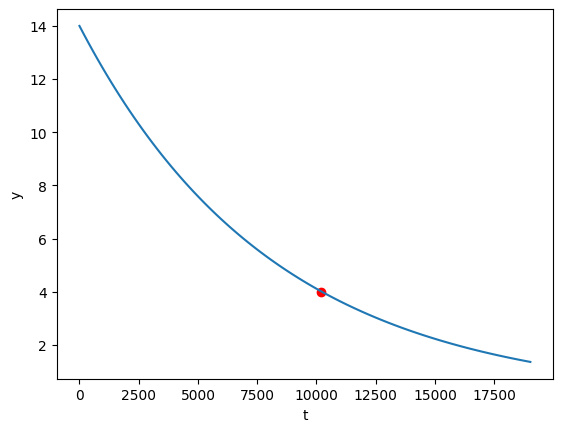

In [12]:
#Question 7



def f7(N):
    L = np.log(2)/(5730 * 365 * 24 * 60)
    return -L*N

#initial values - number of atoms decay in the first minute
N0 = 14 

n = 100

T = [0, 1e10]

t, y = feuler(f7, T, N0, n)

#graph plotting
plt.plot(t/(365 * 24 * 60), y)

#when N(t) = 4
Nt = 4
index = np.argmin(np.abs(y - Nt))
t_value = t[index]

# Display the result
print(f"The age of the artifact which has N(t) = {Nt} is {t_value/(365 * 24 * 60)} years")

# Highlight the point on the graph
plt.scatter(t_value/(365 * 24 * 60), Nt, color='red')

# Show the graph
plt.xlabel("t")
plt.ylabel("y")
plt.show()